In [73]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [74]:
!python3 -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [75]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [76]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('2018') if '.txt' in b.name]

In [77]:
all_books

[<DirEntry '2018.txt'>]

In [78]:
book = all_books[0]
# book = cryptojacking
book_text = open(book).read()
print(book_text)

Meet the Scarlett Johansson PostgreSQL malware attack

An image of the popular actress is being used as a malware attack vector on the open-source DBMS PostgreSQL.

Written by Steven Vaughan-Nichols, Senior Contributing Editor March 15, 2018 at 4:25 p.m. PT

Security

8 habits of highly secure remote workers

How to find and remove spyware from your phone

The best VPN services: How do the top 5 compare?

How to find out if you are involved in a data breach -- and what to do next

It's not the first time an image has been used to give a victim malware, but it may be the first time it's been used so narrowly. According to the security firm Imperva, their StickyDB database management system (DBMS) honeypot has uncovered an attack that places malware, which cryptomines Monero, on PostgreSQL DBMS servers. Its attack vector? An image of Hollywood star Scarlett Johansson.

Now, you might ask, "How many PostgreSQL DBMS servers are out there on the internet to be attacked?" The answer: "More t

In [79]:
all_entities = NER(book_text)

In [80]:
entity_types_to_remove = ["CARDINAL", "TIME", "DATE", "ORDINAL", "QUANTITY", "PERCENT", "MONEY"]
filtered_entities =[ent.text for ent in all_entities.ents if ent.label_ not in entity_types_to_remove]
print(filtered_entities)

['DBMS', 'Steven Vaughan-Nichols', 'Imperva', 'DBMS', 'Monero', 'DBMS', 'Hollywood', 'Scarlett Johansson', 'Shodan', 'Amazon Web Services', 'Smominru', 'Windows', 'Smominru', 'EternalBlue', 'Scarlett', 'Linux', 'Monero', 'GPU', 'Imperva', 'Imperva', 'pg_proc', 'Johansson', 'Amazon Aurora PostgreSQL', 'Cyber', 'Windows', 'Tesla', 'Kubernetes', 'Tesla', 'Amazon Web Services', 'RedLock', 'Cloud Security', 'the RedLock Cloud Security Intelligence', 'CSI', 'RedLock', 'RedLock', 'API', 'Chrome', 'Gaurav Kumar', 'CTO', 'Tesla', 'Hackers', 'Kubernetes', 'RedLock', 'Kubernetes', 'Google', 'Tesla', 'Amazon\n Web Services', 'Stratum', 'RedLock', 'British', 'Aviva\n ', 'Dutch', 'Gemalto', 'RedLock', 'Tesla', 'RedLock', 'Tesla', 'Tesla', 'Tesla', 'RedLock CTO Gaurav', 'Kumar', 'Kumar', 'Amazon', 'Microsoft', 'Google', 'Cryptojacking', 'CPU', 'Browsealoud', 'U.K.', 'U.S.', 'Australia', 'Browsealoud', 'U.S.', 'Salon', 'Central Processing Unit', 'CPU', 'Monero', 'CPU', 'Symantec', 'CPU', 'Symantec', '

In [81]:
# Visualize identified entities
displacy.render(all_entities[0:2000], style="ent", jupyter=True)

## Get named entity list per sentence

In [82]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in all_entities.sents:
    entity_list = [ent.text for ent in sent.ents if ent.label_ not in entity_types_to_remove]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)
print(sent_entity_df.head(10))

                                            sentence  \
0  (Meet, the, Scarlett, Johansson, PostgreSQL, m...   
1  (Written, by, Steven, Vaughan, -, Nichols, ,, ...   
2  (It, 's, not, the, first, time, an, image, has...   
3  (According, to, the, security, firm, Imperva, ...   
4                           (Its, attack, vector, ?)   
5  (An, image, of, Hollywood, star, Scarlett, Joh...   
6  (Now, ,, you, might, ask, ,, ", How, many, Pos...   
7  (The, answer, :, ", More, than, you, 'd, expec...   
8  (A, Shodan, search, revealed, almost, 710,000,...   
9  (It, appears, there, are, so, many, of, them, ...   

                          entities  
0                           [DBMS]  
1         [Steven Vaughan-Nichols]  
2                               []  
3    [Imperva, DBMS, Monero, DBMS]  
4                               []  
5  [Hollywood, Scarlett Johansson]  
6                               []  
7                               []  
8                         [Shodan]  
9            

In [83]:
sent_entity_df

,sentence,entities
0,"(Meet, the, Scarlett, Johansson, PostgreSQL, m...",[DBMS]
1,"(Written, by, Steven, Vaughan, -, Nichols, ,, ...",[Steven Vaughan-Nichols]
2,"(It, 's, not, the, first, time, an, image, has...",[]
3,"(According, to, the, security, firm, Imperva, ...","[Imperva, DBMS, Monero, DBMS]"
4,"(Its, attack, vector, ?)",[]
5,"(An, image, of, Hollywood, star, Scarlett, Joh...","[Hollywood, Scarlett Johansson]"
6,"(Now, ,, you, might, ask, ,, "", How, many, Pos...",[]
7,"(The, answer, :, "", More, than, you, 'd, expec...",[]
8,"(A, Shodan, search, revealed, almost, 710,000,...",[Shodan]
9,"(It, appears, there, are, so, many, of, them, ...",[Amazon Web Services]


In [84]:
# Filter out sentences that don't have any entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities
0,"(Meet, the, Scarlett, Johansson, PostgreSQL, m...",[DBMS]
1,"(Written, by, Steven, Vaughan, -, Nichols, ,, ...",[Steven Vaughan-Nichols]
3,"(According, to, the, security, firm, Imperva, ...","[Imperva, DBMS, Monero, DBMS]"
5,"(An, image, of, Hollywood, star, Scarlett, Joh...","[Hollywood, Scarlett Johansson]"
8,"(A, Shodan, search, revealed, almost, 710,000,...",[Shodan]
9,"(It, appears, there, are, so, many, of, them, ...",[Amazon Web Services]
13,"(The, Smominru, miner, alone, has, infected, a...","[Smominru, Windows]"
14,"(While, Smominru, used, the, relatively, sophi...","[Smominru, EternalBlue]"
15,"(In, this, attack, ,, what, appears, to, be, a...",[Scarlett]
18,"(A, compromised, system, then, uses, PostgreSQ...","[Linux, Monero]"


In [85]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities
0,"(Meet, the, Scarlett, Johansson, PostgreSQL, m...",[DBMS]
1,"(Written, by, Steven, Vaughan, -, Nichols, ,, ...",[Steven Vaughan-Nichols]
3,"(According, to, the, security, firm, Imperva, ...","[Imperva, DBMS, Monero, DBMS]"
5,"(An, image, of, Hollywood, star, Scarlett, Joh...","[Hollywood, Scarlett Johansson]"
8,"(A, Shodan, search, revealed, almost, 710,000,...",[Shodan]
...,...,...
304,"(Companies, such, as, oil, pipeline, giant, Tr...","[Transneft, CoinHive]"
305,"(Malware, image, via, Shutterstock, \n\n, Disc...","[Malware, Shutterstock\n\nDisclosure\n\nPlease]"
308,"(In, November, 2023, ,, CoinDesk, was, acquire...","[CoinDesk, Bullish]"
309,"(The, Bullish, group, is, majority, -, owned, ...",[Block.one]


## Create relationships

In [86]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [87]:
relationship_df = pd.DataFrame(relationships)

In [88]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,DBMS,Steven Vaughan-Nichols
1,Steven Vaughan-Nichols,Imperva
2,Imperva,DBMS
3,DBMS,Monero
4,Monero,DBMS
5,DBMS,Hollywood
6,Hollywood,Scarlett Johansson
7,Steven Vaughan-Nichols,Imperva
8,Imperva,DBMS
9,DBMS,Monero


In [89]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,DBMS,Steven Vaughan-Nichols
1,Imperva,Steven Vaughan-Nichols
2,DBMS,Imperva
3,DBMS,Monero
4,DBMS,Monero
5,DBMS,Hollywood
6,Hollywood,Scarlett Johansson
7,Imperva,Steven Vaughan-Nichols
8,DBMS,Imperva
9,DBMS,Monero


In [90]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [91]:
relationship_df.head(10)

,source,target,value
0,DBMS,Steven Vaughan-Nichols,1
1,Imperva,Steven Vaughan-Nichols,2
2,DBMS,Imperva,4
3,DBMS,Monero,8
4,DBMS,Hollywood,4
5,Hollywood,Scarlett Johansson,6
6,Scarlett Johansson,Shodan,3
7,Amazon Web Services,Shodan,5
8,Amazon Web Services,Smominru,2
9,Smominru,Windows,11


## Graph analysis and visualization

In [92]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

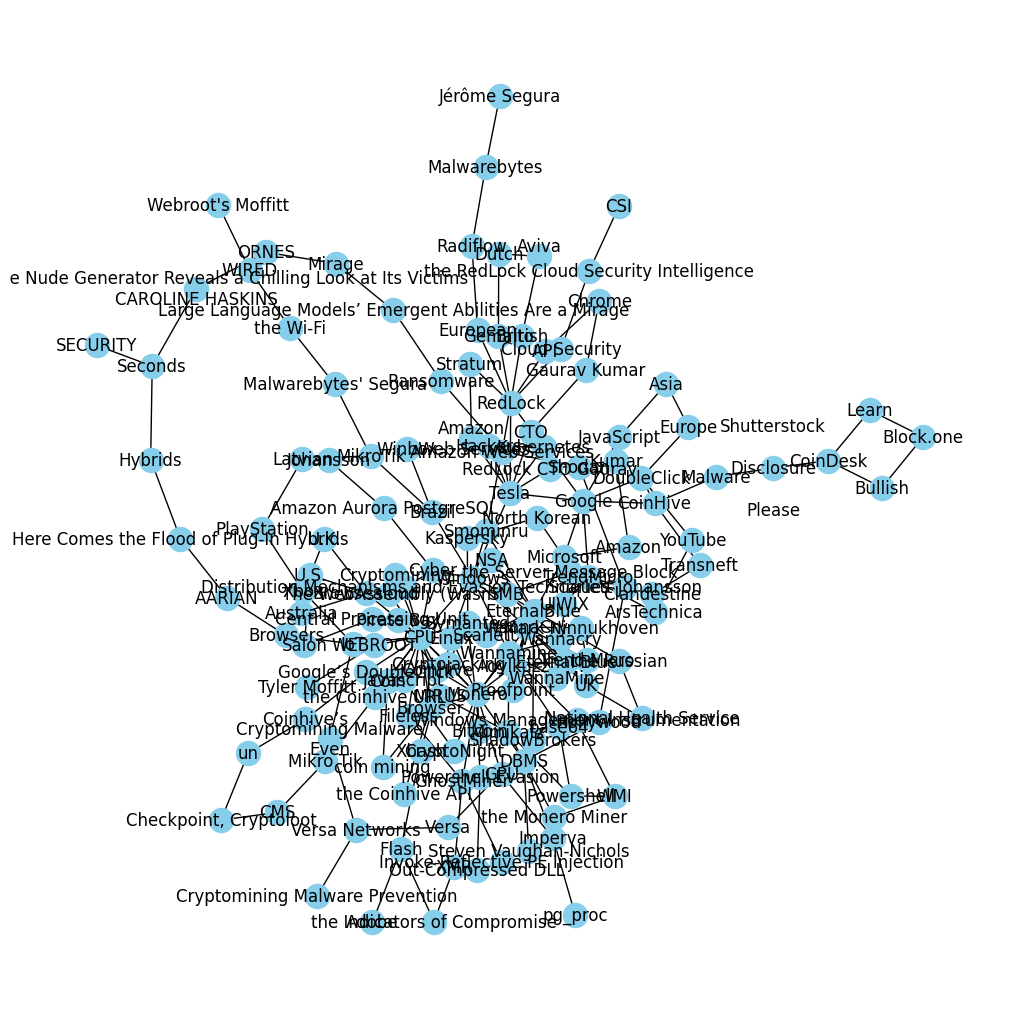

In [93]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [94]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


### The most important characters in The Witcher

In [95]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'DBMS': 0.026490066225165563,
 'Steven Vaughan-Nichols': 0.013245033112582781,
 'Imperva': 0.026490066225165563,
 'Monero': 0.09933774834437085,
 'Hollywood': 0.013245033112582781,
 'Scarlett Johansson': 0.013245033112582781,
 'Shodan': 0.013245033112582781,
 'Amazon Web Services': 0.033112582781456956,
 'Smominru': 0.019867549668874173,
 'Windows': 0.06622516556291391,
 'EternalBlue': 0.059602649006622516,
 'Scarlett': 0.013245033112582781,
 'Linux': 0.033112582781456956,
 'GPU': 0.013245033112582781,
 'pg_proc': 0.006622516556291391,
 'Amazon Aurora PostgreSQL': 0.013245033112582781,
 'Johansson': 0.006622516556291391,
 'Cyber': 0.026490066225165563,
 'Tesla': 0.059602649006622516,
 'Kubernetes': 0.026490066225165563,
 'RedLock': 0.059602649006622516,
 'Cloud Security': 0.013245033112582781,
 'the RedLock Cloud Security Intelligence': 0.013245033112582781,
 'CSI': 0.006622516556291391,
 'API': 0.013245033112582781,
 'Chrome': 0.013245033112582781,
 'Gaurav Kumar': 0.0132450331125827

<Axes: >

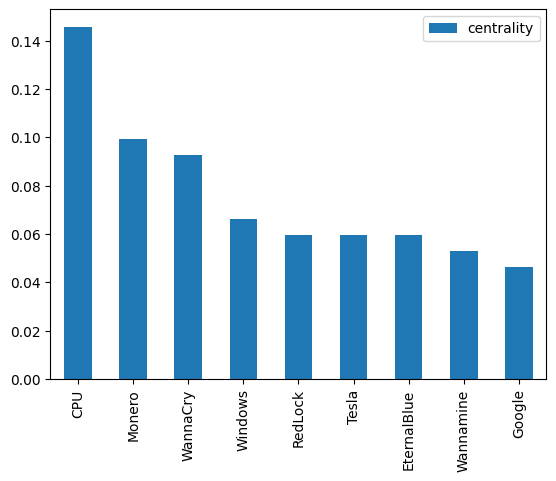

In [96]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

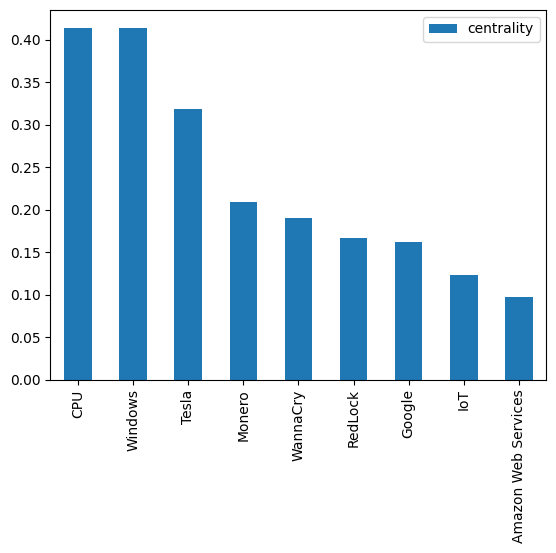

In [97]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

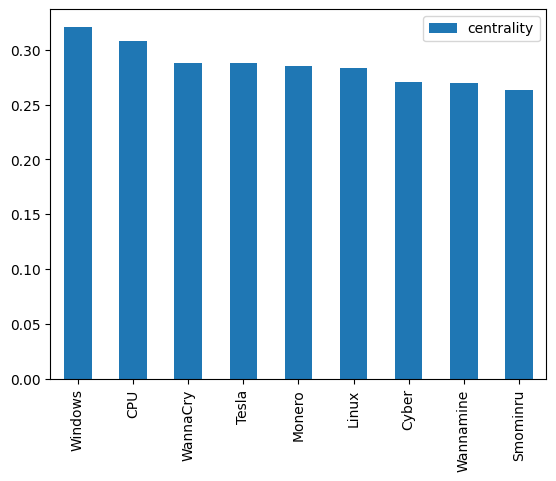

In [98]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [99]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [100]:
!pip install python-louvain

### Community detection

In [101]:
from community import community_louvain

In [102]:
communities = community_louvain.best_partition(G)

In [103]:
communities

{'DBMS': 0,
 'Steven Vaughan-Nichols': 0,
 'Imperva': 0,
 'Monero': 1,
 'Hollywood': 0,
 'Scarlett Johansson': 0,
 'Shodan': 0,
 'Amazon Web Services': 2,
 'Smominru': 6,
 'Windows': 6,
 'EternalBlue': 6,
 'Scarlett': 6,
 'Linux': 6,
 'GPU': 0,
 'pg_proc': 0,
 'Amazon Aurora PostgreSQL': 4,
 'Johansson': 4,
 'Cyber': 4,
 'Tesla': 2,
 'Kubernetes': 2,
 'RedLock': 2,
 'Cloud Security': 2,
 'the RedLock Cloud Security Intelligence': 2,
 'CSI': 2,
 'API': 2,
 'Chrome': 2,
 'Gaurav Kumar': 2,
 'CTO': 2,
 'Hackers': 2,
 'Google': 2,
 'Amazon\n Web Services': 2,
 'Stratum': 2,
 'British': 2,
 'Aviva\n ': 2,
 'Dutch': 2,
 'Gemalto': 2,
 'RedLock CTO Gaurav': 1,
 'Kumar': 1,
 'Amazon': 1,
 'Microsoft': 1,
 'CPU': 4,
 'Cryptojacking': 1,
 'Browsealoud': 4,
 'U.K.': 4,
 'U.S.': 4,
 'Australia': 4,
 'Salon': 4,
 'Central Processing Unit': 4,
 'Symantec': 1,
 'Bitcoin': 1,
 'Browser': 4,
 'coin mining': 4,
 'Coin': 4,
 'Coinhive': 4,
 'WEBROOT': 4,
 'Tyler Moffitt': 4,
 'Jérôme Segura': 2,
 'Malwar

In [104]:
nx.set_node_attributes(G, communities, 'group')

In [105]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_2018.html")

witcher_2018.html


### Evolution of characters' importance

In [106]:
from lib.utils.functions import *

In [107]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('2018') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [108]:
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)


AttributeError: 'DataFrame' object has no attribute 'character_entities'

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()